<a href="https://colab.research.google.com/github/Ratna-code/statistical-analysis-/blob/main/Independent_2_sample_t_test_%26_Paired_2_sample_T_test_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Independent 2 sample t-test**

An independent two-sample t-test, also known as an unpaired t-test, is a statistical method used to compare the means of two independent groups to determine if there is a significant difference between them.



**Assumptions for the test**
- **1.Independence of observations**: The two samples must be independent, meaning there is no relationship between the observations in one group and the observations in the other group. The subjects in the two groups should be selected randomly and independently.

- 2**.Normality**: The data in each of the two groups should be approximately normally distributed. The t-test is considered robust to mild violations of normality, especially when the sample sizes are large (typically n ≥ 30) and the sample sizes of the two groups are similar. If the data is highly skewed or has substantial outliers, consider using a non-parametric test, such as the Mann-Whitney U test.

- 3.**Equal variances (Homoscedasticity)**: The variances of the two populations should be approximately equal. This assumption can be checked using F-test for equality of variances. If this assumption is not met, you can use Welch's t-test, which does not require equal variances.

- 4.**Random sampling:** The data should be collected using a random sampling method from the respective populations. This ensures that the sample is representative of the population and reduces the risk of selection bias.

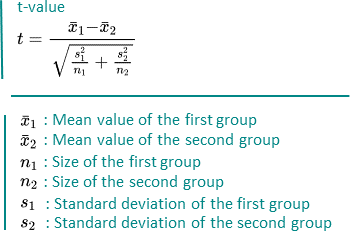

Q. Suppose a website owner claims that there is no difference in the average time spent on their website between desktop and mobile users. To test this claim, we collect data from 30 desktop users and 30 mobile users regarding the time spent on the website in minutes. The sample statistics are as follows:

desktop users = [12, 15, 18, 16, 20, 17, 14, 22, 19, 21, 23, 18, 25, 17, 16, 24, 20, 19, 22, 18, 15,14, 23, 16, 12, 21, 19, 17, 20, 14]

mobile_users = [10, 12, 14, 13, 16, 15, 11, 17, 14, 16, 18, 14, 20, 15, 14, 19, 16, 15, 17, 14, 12, 11, 18, 15, 10, 16, 15, 13, 16, 11]
- Desktop users:

- Sample size (n1): 30
- Sample mean (mean1): 18.5 minutes
- Sample standard deviation (std_dev1): 3.5 minutes



- Mobile users:

- Sample size (n2): 30
- Sample mean (mean2): 14.3 minutes
- Sample standard deviation (std_dev2): 2.7 minutes

We will use a significance level (α) of 0.05 for the hypothesis test.

Null Hypothesis (H0):
- There is no significant difference in the average time spent on the website between desktop and mobile users.

Alternative Hypothesis (H1):
- There is a significant difference in the average time spent on the website between desktop and mobile users.

In [38]:
# The Shapiro-Wilk test returns two values: the test statistic (W) and the p-value.
# If the p-value is greater than your chosen significance level (α = 0.05),
# you can assume the data comes from a normally distributed population.
# If the p-value is less than or equal to the significance level, the normality assumption is not met,
# and you should consider applying a data transformation or using a non-parametric test like the Mann-Whitney U test.


from scipy.stats import shapiro

# Input the data as lists
desktop_users = [12, 15, 18, 16, 20, 17, 14, 22, 19, 21, 23, 18, 25, 17, 16, 24, 20, 19, 22, 18, 15, 14, 23, 16, 12, 21, 19, 17, 20, 14]
mobile_users = [10, 12, 14, 13, 16, 15, 11, 17, 14, 16, 18, 14, 20, 15, 14, 19, 16, 15, 17, 14, 12, 11, 18, 15, 10, 16, 15, 13, 16, 11]

# Perform the Shapiro-Wilk test for both desktop and mobile users
shapiro_desktop = shapiro(desktop_users)
shapiro_mobile = shapiro(mobile_users)

print("Shapiro-Wilk test for desktop users:", shapiro_desktop)
print("Shapiro-Wilk test for mobile users:", shapiro_mobile)


Shapiro-Wilk test for desktop users: ShapiroResult(statistic=0.9783114194869995, pvalue=0.7790969014167786)
Shapiro-Wilk test for mobile users: ShapiroResult(statistic=0.9714356064796448, pvalue=0.5791608691215515)


In [39]:
# If the p-value from Levene's test is greater than your chosen significance level (α = 0.05), you can assume equal variances
#  If the p-value is less than or equal to the significance level, the assumption of equal variances is not met,
# and you should consider using Welch's t-test instead of the regular independent two-sample t-test.

from scipy.stats import levene

# Input the data as lists
desktop_users = [12, 15, 18, 16, 20, 17, 14, 22, 19, 21, 23, 18, 25, 17, 16, 24, 20, 19, 22, 18, 15, 14, 23, 16, 12, 21, 19, 17, 20, 14]
mobile_users = [10, 12, 14, 13, 16, 15, 11, 17, 14, 16, 18, 14, 20, 15, 14, 19, 16, 15, 17, 14, 12, 11, 18, 15, 10, 16, 15, 13, 16, 11]

# Perform Levene's test
levene_test = levene(desktop_users, mobile_users)
print(levene_test)


LeveneResult(statistic=2.94395488191752, pvalue=0.09153720526741761)


In [40]:
# Perform the independent two-sample t-test
from scipy.stats import stats

t_test = stats.ttest_ind(desktop_users, mobile_users, equal_var=True)
print(t_test)


TtestResult(statistic=4.625335930681123, pvalue=2.1422811334975257e-05, df=58.0)


<ipython-input-40-fb8b959c04ff>:4: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  t_test = stats.ttest_ind(desktop_users, mobile_users, equal_var=True)


In [41]:
# Interpret the results
if t_test.pvalue < 0.05:
  print("Reject the null hypothesis. There is a significant difference in the average time spent on the website between desktop and mobile users.")
else:
  print("Fail to reject the null hypothesis. There is no significant difference in the average time spent on the website between desktop and mobile users.")


Reject the null hypothesis. There is a significant difference in the average time spent on the website between desktop and mobile users.


Independent 2 sample t-test For Titanic Dataset

In [42]:
# prompt: import titanic dataset y seaborn

import seaborn as sns
import pandas as pd

# Load the Titanic dataset
titanic = sns.load_dataset('titanic')
pop_male = titanic[titanic['sex'] == 'male']['age'].dropna()
pop_female = titanic[titanic['sex'] == 'female']['age'].dropna()



In [43]:
sample_male = pop_male.sample(25)
sample_female = pop_female.sample(25)

alpha = 0.05

In [44]:
# H0 - Mean age of male and female are similar
# H1 - Mean age of male is higher than female

In [45]:
from scipy.stats import shapiro

# Perform the Shapiro-Wilk test for both male and female age
shapiro_male = shapiro(sample_male)
shapiro_female = shapiro(sample_female)

print("Shapiro-Wilk test for male age:", shapiro_male)
print("Shapiro-Wilk test for female age :", shapiro_female)

Shapiro-Wilk test for male age: ShapiroResult(statistic=0.9031625986099243, pvalue=0.021512188017368317)
Shapiro-Wilk test for female age : ShapiroResult(statistic=0.9497250318527222, pvalue=0.2471713125705719)


In [46]:
from scipy.stats import levene

# Perform Levene's test
levene_test = levene(sample_male, sample_female)
print(levene_test)

LeveneResult(statistic=0.3262893857027946, pvalue=0.5705172765711095)


In [47]:
import scipy.stats as stats

t_statistic, p_value = stats.ttest_ind(sample_male, sample_female)

print("t-statistic:", t_statistic)
print("p-value:", p_value/2)

t-statistic: 0.8614994857545691
p-value: 0.19662318920460214


In [49]:
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Fail to reject the null hypothesis.


**Paired 2 sample t-test**

A paired two-sample t-test, also known as a dependent or paired-samples t-test, is a statistical
test used to compare the means of two related or dependent groups.

Common scenarios where a paired two-sample t-test is used include:
- Before-and-after studies: Comparing the performance of a group before and after an intervention or treatment.

- Matched or correlated groups: Comparing the performance of two groups that are
matched or correlated in some way, such as siblings or pairs of individuals with similar characteristics.

Assumptions



1. Normality: The differences between the paired observations should be approximately
normally distributed. This assumption can be checked using graphical methods (e.g.,
histograms, Q-Q plots) or statistical tests for normality (e.g., Shapiro-Wilk test). Note that
the t-test is generally robust to moderate violations of this assumption when the sample
size is large.


2. Independence of pairs: Each pair of observations should be independent of other pairs. In
other words, the outcome of one pair should not affect the outcome of another pair. This
assumption is generally satisfied by appropriate study design and random sampling.

3. Paired observations: The two sets of observations must be related or paired in some way,
such as before-and-after measurements on the same subjects or observations from
matched or correlated groups.

Let's assume that a fitness center is evaluating the effectiveness of a new 8-week weight lossprogram. They enroll 15 participants in the program and measure their weights before and after the program. The goal is to test whether the new weight loss program leads to a significant reduction in the participants' weight.

- Before the program:
[80, 92, 75, 68, 85, 78, 73, 90, 70, 88, 76, 84, 82, 77, 91]


- After the program:
[78, 93, 81, 67, 88, 76, 74, 91, 69, 88, 77, 81, 80, 79, 88]


Significance level (α) = 0.05

 Null Hypothesis (H0):
There is no significant difference in the mean weight of participants before and after the weight loss program.

Alternative Hypothesis (H1):
There is a significant reduction in the mean weight of participants after the weight loss program.

In [53]:

# Import necessary libraries
import scipy.stats as stats

# Input the data
before_weights = [80, 92, 75, 68, 85, 78, 73, 90, 70, 88, 76, 84, 82, 77, 91]
after_weights = [78, 93, 81, 67, 88, 76, 74, 91, 69, 88, 77, 81, 80, 79, 88]

# Calculate the difference in weights
weight_diff = [before - after for before, after in zip(before_weights, after_weights)]

# Perform the Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(weight_diff)
print("Shapiro-Wilk test for normality:", shapiro_test)

# Perform the paired two-sample t-test
t_test = stats.ttest_rel(before_weights, after_weights)
print("Paired two-sample t-test:", t_test)

# Interpret the results
alpha = 0.05
if t_test.pvalue < alpha:
  print("Reject the null hypothesis. There is a significant reduction in the mean weight of participants after the weight loss program.")
else:
  print("Fail to reject the null hypothesis. There is no significant difference in the mean weight of participants before and after the weight loss program.")


Shapiro-Wilk test for normality: ShapiroResult(statistic=0.9220570921897888, pvalue=0.20704729855060577)
Paired two-sample t-test: TtestResult(statistic=-0.10482848367219182, pvalue=0.9179989706285087, df=14)
Fail to reject the null hypothesis. There is no significant difference in the mean weight of participants before and after the weight loss program.
